In [18]:
import random
import networkx as nx
%matplotlib inline

In [73]:
def anzahlKanten(g):
    return sum([len(k) for k in g.values()])

def randomGraph(anzKnoten,anzKanten):
    g = {i : set() for i in range(anzKnoten)}
    knoten = set(range(anzKnoten))
    anzahl = anzahlKanten(g)
    while anzahl < anzKanten:
        v = random.choice(list(knoten))
        w = random.choice(list(knoten - {v}))
        if not v in g[w]:   # keine hinhier-Beziehungen
            g[v].add(w)
        anzahl = anzahlKanten(g)
    return g

def getKnoten(g):
    return list(g.keys())

def getKantenList(g):
    return [(v,w) for v in g for w in g[v]]

In [74]:
def drawDiGraph(g):
    knoten = getKnoten(g)
    kanten = getKantenList(g)
    netz = nx.DiGraph()
    netz.add_nodes_from(knoten)
    netz.add_edges_from(kanten)
    pos=nx.circular_layout(netz) 
    knotenbezeichnung ={v : str(v) for v in G}
    nx.draw(netz,pos,node_color='g',node_size=300,alpha=0.3)
    nx.draw_networkx_labels(netz,pos,knotenbezeichnung,font_size=14)
 

In [75]:

def explore(v):
    global counter
    visited[v] = True
    previsit[v] = counter
    counter += 1
    for w in sorted(G[v]):  #  alphabetische Reihenfolge
        if not visited[w]:
            explore(w)
    postvisit[v] = counter
    counter += 1
    
def edgeType(u,v):
    if previsit[u] < previsit[v] < postvisit[v] < postvisit[u]: return 'tree/forward-edge'
    if previsit[v] < previsit[u] < postvisit[u] < postvisit[v]: return 'back-edge'
    if postvisit[v] < previsit[u] : return 'cross-edge'


def printEdgeTypes(G):
    global counter
   
    for v in G:
        if not visited[v] :
            explore(v)
    for v in sorted(G.keys(),key=lambda v: previsit[v]):
        print("{:2} {:2} {:2}".format(v,previsit[v],postvisit[v]))

    for u in G:
        for v in sorted(G[u]):
            print(u,v,edgeType(u,v))
  

KeyError: 'a'

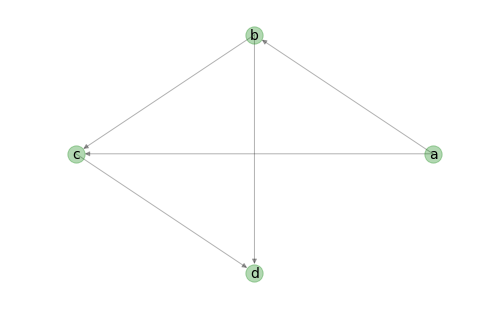

In [76]:
# Dieser Graph enthält keine back-edge

visited = {v : False for v in G}
previsit = {v : 0 for v in G}
postvisit = {v : 0 for v in G}
counter = 1

G = {'a':set('bc'),
     'b':set('cd'), 
     'c':set('d'),
     'd':set()}

drawDiGraph(G)
printEdgeTypes(G)


 0  1 18
 4  2 15
 3  3 14
 2  4 13
 5  5  6
 6  7 12
10  8 11
 9  9 10
 7 16 17
 1 19 20
 8 21 22
11 23 24
0 4 tree/forward-edge
0 7 tree/forward-edge
1 6 cross-edge
1 10 cross-edge
2 5 tree/forward-edge
2 6 tree/forward-edge
3 2 tree/forward-edge
4 3 tree/forward-edge
6 5 cross-edge
6 10 tree/forward-edge
7 2 cross-edge
8 4 cross-edge
9 0 back-edge
10 0 back-edge
10 9 tree/forward-edge
11 4 cross-edge
11 7 cross-edge

[[0, 7, 2, 6, 10, 9], [0, 7, 2, 6, 10], [0, 4, 3, 2, 6, 10, 9], [0, 4, 3, 2, 6, 10]]


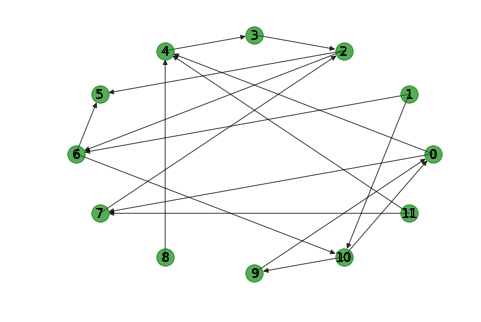

In [89]:
random.seed(41)
G = randomGraph(12,17)
knoten = getKnoten(G)
kanten = getKantenList(G)

netz = nx.DiGraph()
netz.add_nodes_from(knoten)
netz.add_edges_from(kanten)
pos=nx.circular_layout(netz)  
#pos=nx.random_layout(netz)
#pos=nx.spring_layout(netz)

knotenbezeichnung ={v : str(v) for v in G}
nx.draw(netz,pos,node_color='g',node_size=300,alpha=0.5)
nx.draw_networkx_labels(netz,pos,knotenbezeichnung,font_size=10)
# Dieser Graph enthält keine back-edge

visited = {v : False for v in G}
previsit = {v : 0 for v in G}
postvisit = {v : 0 for v in G}
counter = 1


drawDiGraph(G)
printEdgeTypes(G)
print()

print(list(nx.simple_cycles(netz)))

In [85]:
# gibt es eine Kante von a nach b?
a = 6
b = 22
b in g[a] , netz.has_edge(a,b)

(True, False)

In [149]:
# alle Nachbarn von a
a = 22 
g[a] ,[n for n in netz.neighbors(a)]

({13}, [13])

In [162]:
# alle erreichbaren
visited =  {v : False for v in g}       
def explore(v):  
    visited[v] = True
    for w in g[v]:
        if not visited[w]:
            explore(w) 
            
s = 6
explore(s)
print({v for v in g if visited[v] and v != s} )         
print(nx.algorithms.dag.descendants(netz,s))

{1, 2, 3, 4, 7, 8, 9, 10, 13, 15, 17, 18, 19, 22, 23, 24, 26, 27, 28}
{1, 2, 3, 4, 7, 8, 9, 10, 13, 15, 17, 18, 19, 22, 23, 24, 26, 27, 28}


In [10]:
G = {'a':set('bc'),
     'b':set('cd'), 
     'c':set('bd'),
     'd':set()}

 
visited =  {v : False for v in G}      
inprogress = set()

def explore(v):  
    inprogress.add(v)
    visited[v] = True
    for w in G[v]:
        if w in inprogress:
            print('cycle detected')
        if not visited[w]:
            parent[w] = v
            explore(w) 
    inprogress.remove(v)
            
for v in G:
    if not visited[v] :
        explore(v)


cycle detected


In [4]:
parent

{'c': None, 'd': 'c', 'b': 'd'}

Die previsit, postvisit Nummerierung gibt uns Hinweise auf den Kantentyp

```
(u,v)
[u [v ]v ]u   - tree edge
[v [u ]u ]v   - back edge
[v ]v [u ]u   - cross edge

```


In [15]:
G = {
'a': set('bcd'),
'b': set('ac'),
'c': set('ab'),
'd': set('a'),
'e': set('f'),
'f': set('e'),
'g': set('hi'),
'h': set('gi'),
'i': set('gh'),
}


def explore(v):
    global counter
    visited[v] = True
    previsit[v] = counter
    counter += 1
    for w in sorted(G[v]):  #  alphabetische Reihenfolge
        if not visited[w]:
            explore(w)
    postvisit[v] = counter
    counter += 1

visited = {v : False for v in G}
previsit = {v : 0 for v in G}
postvisit = {v : 0 for v in G}
counter = 1

for v in G.keys():
    if not visited[v] :
        explore(v)

for v in sorted(G.keys(),key=lambda v: previsit[v]):
    print("{:2} {:2} {:2}".format(v,previsit[v],postvisit[v]))
    
def edgeType(u,v):
    if previsit[u] < previsit[v] < postvisit[v] < postvisit[u]: return 'tree-edge'
    if previsit[v] < previsit[u] < postvisit[u] < postvisit[v]: return 'back-edge'
    if postvisit[v] < previsit[u] : return 'cross-edge'

for u in G:
    for v in G[u]:
        print(u,v,edgeType(u,v))

a   1  8
b   2  5
c   3  4
d   6  7
e   9 12
f  10 11
g  13 18
h  14 17
i  15 16
a d tree-edge
a c tree-edge
a b tree-edge
b a back-edge
b c tree-edge
c a back-edge
c b back-edge
d a back-edge
e f tree-edge
f e back-edge
g i tree-edge
g h tree-edge
h i tree-edge
h g back-edge
i g back-edge
i h back-edge


<function networkx.drawing.nx_pylab.draw(G, pos=None, ax=None, **kwds)>

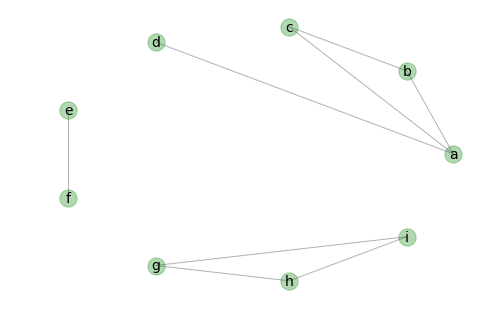

In [26]:
 
knoten = getKnoten(G)
kanten = getKantenList(G)

netz = nx.Graph()
netz.add_nodes_from(knoten)
netz.add_edges_from(kanten)
pos=nx.circular_layout(netz)  
#pos=nx.random_layout(netz)
#pos=nx.spring_layout(netz)

knotenbezeichnung ={v : str(v) for v in G}
nx.draw(netz,pos,node_color='g',node_size=300,alpha=0.3)
nx.draw_networkx_labels(netz,pos,knotenbezeichnung,font_size=14)
nx.draw

In [5]:
g = {2 : {3 : 'a', 5: 'b'}}

In [6]:
list(g[2])

[3, 5]